In [1]:
import numpy as np
import pandas as pd
import cv2
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Dropout, ZeroPadding2D, Input
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
def random_select(X, y):
    random_X = []
    random_y = []
    
    num_of_pic = X.shape[0]
    nums = num_of_pic
    nums = [i for i in range(nums)]
    
    for i in range(num_of_pic):
            num = random.choice(nums)
            random_X.append(X[num])
            random_y.append(y[num])
            nums.remove(num)
            
    return np.array(random_X), np.array(random_y)

In [19]:
name_list = ['amir', 'amir_hoseini','ashkan','davari','khara','mohammad',
             'mosadegh','mostafa','nahang','rahim','taherkhoo']
X = []
y = []
for i in range(len(name_list)):
    for j in range(1,10):
        image = cv2.imread(f'{name_list[i]}/train/{j}.jpg')
        image = cv2.resize(image, (200,200))
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        image_edited = cv2.merge([hsv_image[...,0], cv2.add(hsv_image[...,1], 50), hsv_image[...,2]])
        image_edited = cv2.cvtColor(image_edited, cv2.COLOR_HSV2BGR)
        
        empty_array = np.empty((1,256), np.uint8)
        for k in range(256):
            empty_array[0,k] = np.clip(pow(k/255.0, 0.3)*255, 0, 255)
        out_light = cv2.LUT(image, empty_array)
        
        empty_array = np.empty((1,256), np.uint8)
        for k in range(256):
            empty_array[0,k] = np.clip(pow(k/255.0, 2)*255, 0, 255)
        out_dark = cv2.LUT(image, empty_array)

#         cv2.imshow('main',image)
#         cv2.imshow('1', image_edited)
#         cv2.imshow('2', out_light)
#         cv2.imshow('3', out_dark)
        
        cv2.waitKey()
        cv2.destroyAllWindows()
        for add_img in [image, image_edited, out_dark, out_light]:
            X.append(add_img)
            y.append(i)
        

X = np.array(X)
y = np.array(y)

X , y = random_select(X, y)

X_scale = X / 255

print(X.shape)
print(y.shape)
print(y)
print(X_scale)

(396, 200, 200, 3)
(396,)
[ 9  0  5 10  3  6  7  7  1  3  3  9  1  4  8 10  2  9  7  6  5  8  5  3
 10  6  0 10  2  1  7  3  0  4  7  5  9  2  2  4  5  3  7  1  9  8  0  5
  9  5  2  0  9  1  7  7  1 10  3  3  3  9  8  9  7  6  4  2  3  5  2  4
  5  2  5 10  7  8  7  1  1  3  2  1  0  9  3  4  9  2  6  3  1  6  4  1
  9  4  0  8  2  9  5  1  8  3  6 10  4  2  8  3  7  5  0  2  5  2  6  2
  1 10  9  9  6 10  9  0  3  6  1  5  9  3  7 10  9  6  9  5  2  8  2 10
  1  5  9  1  9  7  3  2  8  0  5  0  8  4  0  5  7  2  3  4  0  4 10  4
 10  4  8  0  8  4  6  3  6  0  5  3 10 10  7  9  2  6  5  7  3  7  7  5
 10  0  5  7  4  4  1  1  6  6  1  9  7  2  7  4  5 10  0  8  2  1 10  4
  4  8  6  2 10  8 10  7 10  4  6  5  1  7  7  8  3  4  0  6  9  9  3  7
 10  7  1  9  6  9  1  2 10  0  2  8  8  6 10  3  3  1 10  2  0  7  4 10
  5  2  3 10  0  6  5  6  8  6  1  5  4  1  8  4 10  8  1  9  8  4  6  6
  0  7  5 10  6  1  7 10  1  8  9  5  6 10 10  7  3  7  8  3  0  5  8  0
  0  0  3  4  9  6 10  6 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape)
print(X_test.shape)

(297, 200, 200, 3)
(99, 200, 200, 3)


In [21]:
y_train_col1 = to_categorical(y_train)
y_test_col1 = to_categorical(y_test)
print(y_train_col1.shape)
print(y_test_col1.shape)
print(y_test_col1[18])

(297, 11)
(99, 11)
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [14]:
model = Sequential([
    Input(shape=(200,200,3)),
    ZeroPadding2D(padding=(1,1)),
    Conv2D(128, 3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.3),
    ZeroPadding2D(padding=(1,1)),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.2),
    ZeroPadding2D(padding=(1,1)),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.2),
    ZeroPadding2D(padding=(1,1)),
    Conv2D(16, 3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.2),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(16,activation='relu'),
    Dropout(0.2),
    Dense(11,activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ zero_padding2d (ZeroPadding2D)       │ (None, 202, 202, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 200, 200, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 100, 100, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 100, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_1 (ZeroPadding2D)     │ (None, 102, 102, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 100, 100, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_2 (ZeroPadding2D)     │ (None, 52, 52, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 50, 50, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_3 (ZeroPadding2D)     │ (None, 27, 27, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 25, 25, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 12, 12, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 423,067 (1.61 MB)

 Trainable params: 423,067 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
mch = ModelCheckpoint(filepath='student_predict1.keras', monitor='val_loss', mode='min', save_best_only=True)

model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_col1, batch_size=7, epochs=140, validation_data=(X_test,y_test_col1), callbacks=[mch])

Epoch 1/140
43/43 ━━━━━━━━━━━━━━━━━━━━ 26s 514ms/step - accuracy: 0.0617 - loss: 18.3765 - val_accuracy: 0.1111 - val_loss: 2.3973
Epoch 2/140
43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 516ms/step - accuracy: 0.0936 - loss: 2.4835 - val_accuracy: 0.0909 - val_loss: 2.3968
Epoch 3/140
43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 509ms/step - accuracy: 0.0736 - loss: 2.4220 - val_accuracy: 0.0909 - val_loss: 2.3976
Epoch 4/140
43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 514ms/step - accuracy: 0.0885 - loss: 2.4194 - val_accuracy: 0.0909 - val_loss: 2.3981
Epoch 5/140
43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 509ms/step - accuracy: 0.1006 - loss: 2.4028 - val_accuracy: 0.0909 - val_loss: 2.3984
Epoch 6/140
43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 508ms/step - accuracy: 0.0849 - loss: 2.3974 - val_accuracy: 0.0909 - val_loss: 2.3990
Epoch 7/140
43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 503ms/step - accuracy: 0.0869 - loss: 2.3923 - val_accuracy: 0.0909 - val_loss: 2.3991
Epoch 8/140
43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 503ms/step - accuracy: 0.1416 - loss: 2.3918 -

43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 513ms/step - accuracy: 0.7703 - loss: 0.7131 - val_accuracy: 0.8384 - val_loss: 0.6756
Epoch 100/140
43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 511ms/step - accuracy: 0.7158 - loss: 0.8627 - val_accuracy: 0.8485 - val_loss: 0.6574
Epoch 101/140
43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 505ms/step - accuracy: 0.7805 - loss: 0.7298 - val_accuracy: 0.8485 - val_loss: 0.6441
Epoch 102/140
43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 511ms/step - accuracy: 0.6886 - loss: 0.9468 - val_accuracy: 0.8182 - val_loss: 0.6284
Epoch 103/140
43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 500ms/step - accuracy: 0.7122 - loss: 0.8033 - val_accuracy: 0.8586 - val_loss: 0.6069
Epoch 104/140
43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 511ms/step - accuracy: 0.7610 - loss: 0.7522 - val_accuracy: 0.8990 - val_loss: 0.5886
Epoch 105/140
43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 519ms/step - accuracy: 0.7821 - loss: 0.6975 - val_accuracy: 0.8687 - val_loss: 0.5392
Epoch 106/140
43/43 ━━━━━━━━━━━━━━━━━━━━ 23s 530ms/step - accuracy: 0.7666 - loss: 0.7221 

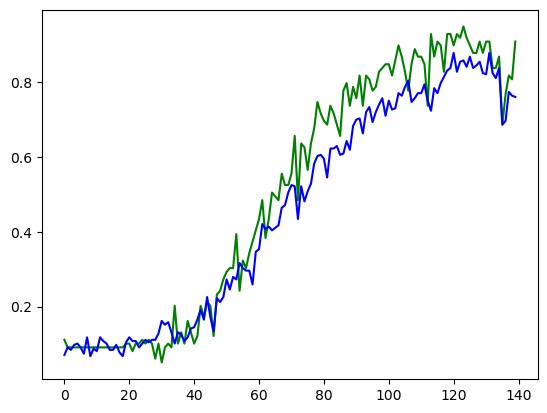

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'], color='green')
plt.plot(history.history['accuracy'], color='blue')

In [17]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_correct = []
name = ''

for i in range(len(y_pred)):
    value = np.argmax(y_pred[i])
    name = name_list[value]
    y_pred_correct.append(value)
    
    image = X_test[i]
    image = cv2.resize(image, (300,300))
    cv2.imshow(name, image)
    cv2.waitKey()
    cv2.destroyAllWindows()

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step


In [18]:
print(classification_report(y_true=y_test, y_pred=y_pred_correct))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       1.00      1.00      1.00         9
           2       1.00      0.82      0.90        11
           3       1.00      0.91      0.95        11
           4       0.64      1.00      0.78         9
           5       0.92      1.00      0.96        11
           6       1.00      0.40      0.57         5
           7       1.00      1.00      1.00        10
           8       0.78      0.88      0.82         8
           9       1.00      1.00      1.00        11
          10       0.88      1.00      0.93         7

    accuracy                           0.91        99
   macro avg       0.93      0.88      0.89        99
weighted avg       0.93      0.91      0.91        99



In [ ]:
#(0:amir) (1:amir_hoseini) (2:ashkan) (3:davari) (4:khara) #(5:mohammad) 
#(6:mosadegh) (7:mostafa) (8:nahang) (9:rahim) (10:taherkhoo)

In [22]:
import keras
from sklearn.metrics import classification_report

loaded_model = keras.saving.load_model('student_predict1.keras')
    
y_pred = loaded_model.predict(X_test)
y_pred_correct = []
name = ''

for i in range(len(y_pred)):
    value = np.argmax(y_pred[i])
    name = name_list[value]
    y_pred_correct.append(value)
    
#     image = X_test[i]
#     image = cv2.resize(image, (300,300))
#     cv2.imshow(name, image)
#     cv2.waitKey()
#     cv2.destroyAllWindows()
    
print(classification_report(y_true=y_test, y_pred=y_pred_correct))

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.92      0.96        12
           2       0.91      1.00      0.95        10
           3       1.00      1.00      1.00         7
           4       0.75      1.00      0.86         9
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00        10
           7       1.00      0.67      0.80         6
           8       1.00      0.86      0.92         7
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00        12

    accuracy                           0.96        99
   macro avg       0.97      0.95      0.95        99
weighted avg       0.97      0.96      0.96        99



In [25]:
import pickle

with open('X_test', 'wb') as f:
    pickle.dump(X_test, f)
    
with open('y_test', 'wb') as f:
    pickle.dump(y_test, f)